<a href="https://colab.research.google.com/github/u-masao/vector-search-tutorial-for-japanese/blob/main/Session01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 日本語テキストのためのベクトル検索、ハンズオン

## ベクトル、内積、類似度

In [2]:
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [4]:
# アイテムベクトルを定義
item_vectors={}
item_vectors[10]=np.array([1,2])
item_vectors[20]=np.array([-2,-2])
item_vectors[30]=np.array([1,-2])
print(item_vectors)

{10: array([1, 2]), 20: array([-2, -2]), 30: array([ 1, -2])}


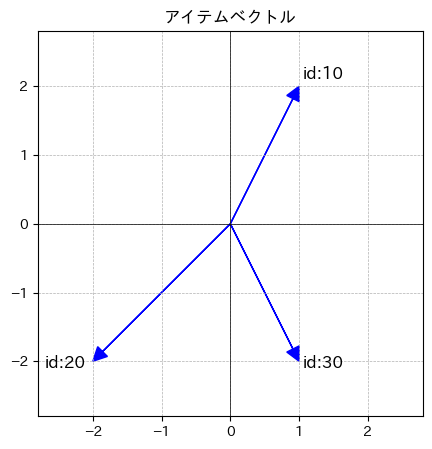

In [29]:
# @title アイテムベクトルの可視化

# ベクトル描画関数
def draw_vector(vec, name, head_length=0.2, color='blue', margin_ratio = 0.05):
    vector_length = np.linalg.norm(vec, ord=2)
    head_ratio = head_length / vector_length
    body_ratio = 1 - head_ratio
    ax.arrow(0, 0, vec[0]*body_ratio, vec[1]*body_ratio, head_width=head_length, head_length=head_length, fc=color, ec=color)
    ax.text(vec[0]*(margin_ratio + 1), vec[1]*(margin_ratio + 1), name, fontsize=12, ha='right' if vec[0]<0 else 'left')

view_range = 2.8

# 描画の設定
fig, ax = plt.subplots(figsize=(6,5))
ax.set_xlim(-view_range, view_range)
ax.set_ylim(-view_range, view_range)
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_aspect('equal', adjustable='box')
ax.set_title('アイテムベクトル')

# ベクトルをプロット
for id, vec in item_vectors.items():
    draw_vector(vec, f"id:{id}")

fig.show()

In [32]:
# クエリベクトルを定義
query_vector=np.array([2,1])
print(query_vector)

[2 1]


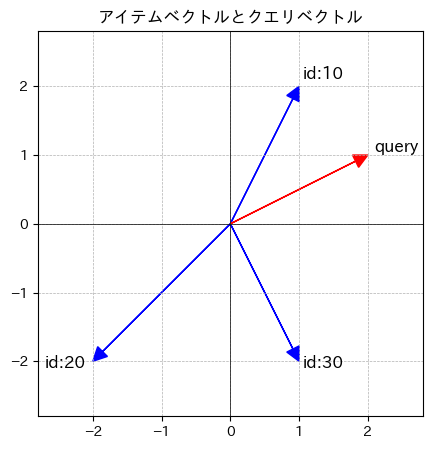

In [34]:
# @title アイテムベクトルとクエリベクトルを可視化
view_range = 2.8

# 描画の設定
fig, ax = plt.subplots(figsize=(6,5))
ax.set_xlim(-view_range, view_range)
ax.set_ylim(-view_range, view_range)
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_aspect('equal', adjustable='box')
ax.set_title('アイテムベクトルとクエリベクトル')

# ベクトルをプロット
for id, vec in item_vectors.items():
    draw_vector(vec, f"id:{id}")

draw_vector(query_vector, 'query', color='red')
fig.show()

In [35]:
# ベクトルを正規化(ノーマライズ)する関数を定義
def normalize(vector):

    # L2 ノルムを計算 → 長さ
    vector_length = np.linalg.norm(vector, ord=2)

    # 長さを 1 にする
    return vector / vector_length

# Dict の値でソートする関数を定義
def sort_by_value_desc(scores):
    return sorted(scores.items(), key=lambda x: x[1], reverse=True)

In [36]:
# 類似度を保持する Dict を初期化
similarities = {}

# クエリーベクトルを正規化
normalized_query_vector = normalize(query_vector)

# 各 Item ベクトルとクエリベクトルの内積を計算
for id, item_vector in item_vectors.items():

    # アイテムベクトルを正規化
    normalized_item_vector = normalize(item_vector)

    # 内積を計算(コサイン類似度)
    similarities[id] = np.dot(normalized_item_vector ,normalized_query_vector)

# 結果を出力
_ = [print(k,f"{v:.3f}") for k,v in sort_by_value_desc(similarities)]

10 0.800
30 0.000
20 -0.949


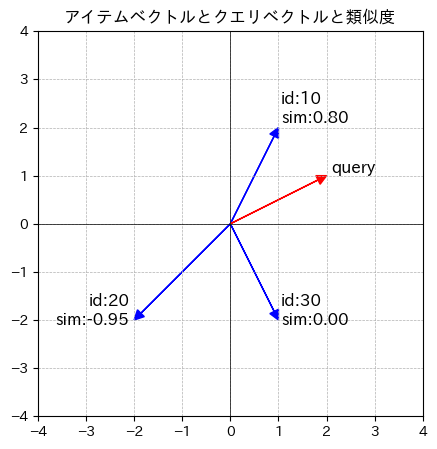

In [41]:
# @title アイテムベクトルとクエリベクトルと類似度の可視化
view_range = 4

# 描画の設定
fig, ax = plt.subplots(figsize=(6,5))
ax.set_xlim(-view_range, view_range)
ax.set_ylim(-view_range, view_range)
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_aspect('equal', adjustable='box')
ax.set_title('アイテムベクトルとクエリベクトルと類似度')

# ベクトルをプロット
for id, vec in item_vectors.items():
    draw_vector(vec, f"id:{id}\nsim:{similarities[id]:.2f}")

draw_vector(query_vector, 'query', color='red')
fig.show()